# <center> Mini Projet data mining : Prédire les prix des voitures</center>

## Module :  Data Mining
## Realiser Par : Walid Oughris
## Encadrer Par : Pr. Mohamed Sabiri

#  I. à propos du projet
dans ce projet, j'essaierai d'utiliser l'algorithme d'apprentissage automatique pour analyser et prédire la voiture et extraire toutes les connaissances contenues dans l'ensemble de données sur la tarification des voitures.

# II- à propos de l'ensemble de données

dans ce projet, j'utiliserai un ensemble de données Car Features and MSRP qui contient des fonctionnalités telles que la marque, le modèle, l'année, le moteur et d'autres propriétés de la voiture utilisées pour prédire son prix.
### link : https://www.kaggle.com/datasets/CooperUnion/cardataset

# III. phase de codage

##  lire l'ensemble de données

In [41]:
import pandas as pd
data = pd.read_csv('car_data.csv') # read the data from csv file that you have locally.
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Importer des bibliothèques

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px

## Analyse exploratoire et visualisation

Afin de comprendre les données disponibles, nous devons effectuer une analyse des données en visualisant la distribution des valeurs dans chaque fonctionnalité et les relations entre le prix de vente et les autres fonctionnalités. Par fonctionnalités, j'entends les colonnes de données.

In [43]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


L'ensemble de données contient 301 lignes et 9 colonnes. Chaque ligne de l'ensemble de données contient des informations sur une voiture. La tâche consiste à trouver un moyen d'estimer la valeur dans la colonne "Selling_Price" en utilisant les valeurs des autres colonnes. Si nous pouvons faire cette estimation pour des données historiques, nous devrions alors être en mesure d'estimer le prix de vente pour les voitures neuves qui ne figurent pas également dans ces données, simplement en fournissant des informations telles que le nom de la voiture, l'année, le prix actuel, les kilomètres parcourus, le type de carburant, le type de vendeur. , transmission et propriétaire

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Nous avons pu voir que l'année, le prix de vente, le prix actuel, les kilomètres parcourus sont des nombres, tandis que le type de carburant, le type de vendeur, la transmission, le propriétaire, le nom de la voiture sont des objets (chaîne) éventuellement des colonnes catégorielles.

Explorez quelques statistiques pour les colonnes numériques :

In [45]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Les colonnes numériques semblent raisonnables, il n'y a aucune anomalie dans aucune des colonnes. À titre d'information secondaire, il semble que le prix de vente et les prix actuels codent les prix réels d'une voiture. Mais cela n'affectera pas notre analyse puisque les valeurs peuvent toujours être traduites en valeurs réelles par le fournisseur de données.

## Analyse des caractéristiques numériques

### Year

Year est une colonne numérique, comme nous pouvons le voir, la valeur maximale est 2018 et la valeur minimale est 2003, nous pouvons la visualiser à l'aide d'un histogramme, avec 16 cases (une case pour chaque année). Ainsi, ci-dessous, nous pouvons voir le nombre de voitures disponibles (compte) pour chaque année. 

In [47]:
fig = px.histogram(data, 
                   x='Year', 
                   marginal='box', 
                   nbins=16, 
                   title='Répartition de l année')
fig.update_layout(bargap=0.1)
fig.show()

### Selling_Price

Visualisons le Selling_Price, incluons également la colonne catégorielle Transmission pour distinguer les prix de vente des voitures manuelles et des voitures automatiques.

In [48]:
fig = px.histogram(data, 
                   x='Selling_Price', 
                   marginal='box', 
                   color='Transmission', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Frais médicaux annuels')
fig.update_layout(bargap=0.1)
fig.show()

### Kilometers Driven

In [49]:
fig = px.histogram(data, 
                   x='Kms_Driven',
                   marginal='box', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Frais médicaux annuels')
fig.update_layout(bargap=0.1)
fig.show()

Comme nous pouvons le voir sur le graphique ci-dessus, la plupart des valeurs numériques vont de 0 à 100 000 km, et il existe quelques valeurs aberrantes.

Une autre hypothèse intuitive que l’on pourrait faire est que plus une voiture fait de kilomètres, plus son prix sera bas. Voyons si cela est vrai. Nous pouvons utiliser un nuage de points pour visualiser la relation entre deux caractéristiques numériques.

In [50]:
fig = px.scatter(data, 
                 x='Kms_Driven',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Kilomètres parcourus par rapport au prix de vente')
fig.update_traces(marker_size=5)
fig.show()

Nous ne pouvons pas dire qu'à partir de ce graphique ci-dessus, nous ne pouvons pas conclure que plus les kilomètres sont longs, plus les prix sont bas. Mais cela peut aussi être dû à la répartition des Km puisque la plupart des valeurs sont comprises entre 0 et 100 000.

Voyons si Selling_Price et Present_Price sont corrélés

In [51]:
fig = px.scatter(data, 
                 x='Present_Price',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

Comme nous pouvons le voir, plus le prix actuel est élevé, plus le prix de vente est élevé, ce qui est également intuitif car il n'y a pas beaucoup de changements entre le prix actuel et le prix de vente sur la base de cette observation.

In [53]:
fig = px.scatter(data, 
                 x='Year',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

On a également pu constater que plus les voitures sont récentes, plus le prix de vente est élevé.

## Corrélation

In [54]:
data.Selling_Price.corr(data.Present_Price)

0.8789825451614953

In [55]:
data.Selling_Price.corr(data.Kms_Driven)

0.02918709067429128

Voici une visualisation.

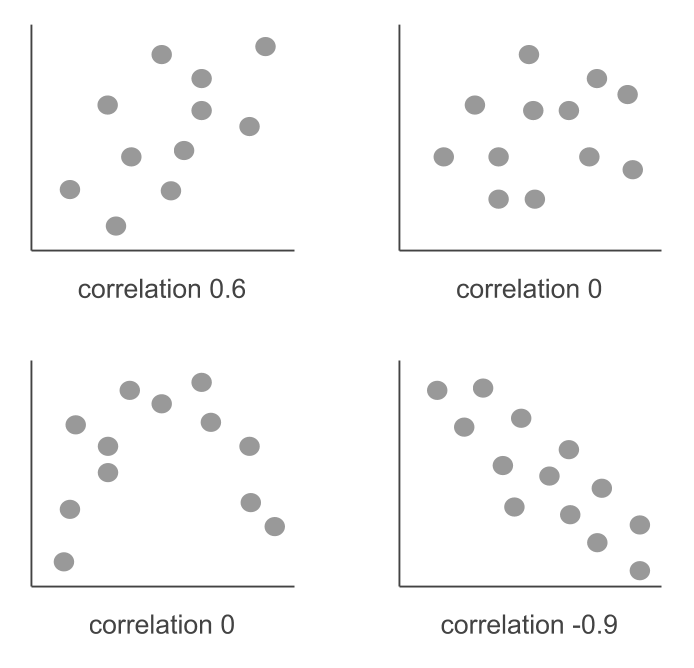

Le coefficient de corrélation est calculé à l'aide de la formule ci-dessous :

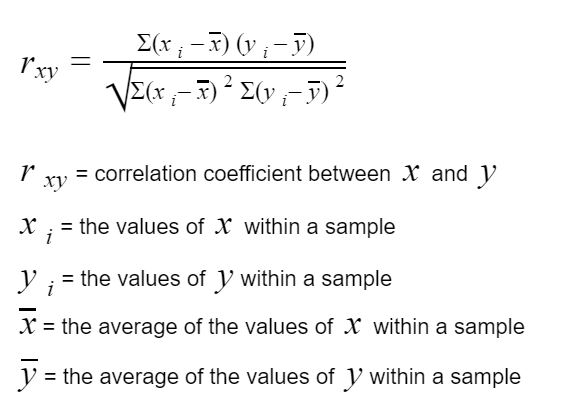

Vous pouvez utiliser la méthode .corr() pour afficher les coefficients de corrélation entre toutes les paires de colonnes numériques.

In [56]:
data.corr()

C:\Users\walid\AppData\Local\Temp\ipykernel_9568\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


Le tableau ci-dessus est généralement visualisé à l'aide d'une carte thermique.

C:\Users\walid\AppData\Local\Temp\ipykernel_9568\2925242371.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix')

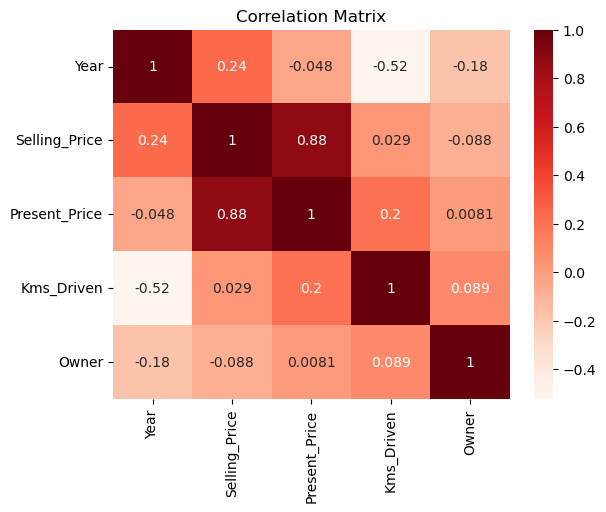

In [57]:
sns.heatmap(data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## Linear Regression 

À partir de la matrice de corrélation, nous avons pu observer que le prix actuel (qui est le prix auquel la voiture a été achetée lorsqu'elle était neuve) et le prix de vente ont une valeur de corrélation élevée. Nous pourrions utiliser cette fonctionnalité « Present Price » pour prédire le résultat souhaité « Selling_price »

In [58]:
fig = px.scatter(data, 
                 x='Present_Price',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

In [59]:
model = LinearRegression()

# Define inputs and targets that will be used to train the model (i.e. learn the weights and biases)
inputs = data[['Present_Price']]
targets = data.Selling_Price
model.fit(inputs,targets) # train the model, this method will find the best line that fits the data and minimize the error using the techniques that were disucssed above

LinearRegression()

Vous pouvez désormais faire des prédictions sur le prix de vente en utilisant vos informations sur le prix actuel.

In [60]:
import numpy as np
model.predict(np.array([[10.8], 
                        [12.5], 
                        [6.9]]))

C:\Users\walid\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([6.30049697, 7.17914031, 4.28478576])

Vous pouvez faire des prédictions sur vos données d'entrée (dont vous connaissez déjà la vraie valeur) et évaluer votre modèle.

In [61]:
predictions = model.predict(inputs)
predictions

array([ 3.60771353,  5.64926719,  5.80949039,  2.86345093,  4.26928029,
        5.79915341,  4.91534157,  5.1685976 ,  5.31331532,  5.3288208 ,
        2.57918397,  6.08342038,  5.8560068 ,  4.70343347,  4.44500896,
        6.29532848,  6.29532848,  6.29532848,  3.34928902,  4.84298271,
        2.76008113,  3.66973542,  4.85848818,  2.50682511,  2.99783168,
        3.29760412,  3.75243126,  4.07287766,  2.76008113,  6.08342038,
        3.80928465,  3.24591921,  4.58972669,  5.86117529,  4.88433063,
        4.71893894,  4.43984047,  1.89694325,  2.66187981,  4.84298271,
        4.78612932,  2.7755866 ,  4.41399802,  4.88433063,  2.10885135,
        6.94138976,  3.24591921,  2.86345093,  4.70343347,  5.52005494,
       16.5392762 , 16.5392762 , 10.93663274, 16.5392762 ,  5.99555604,
        8.49193684,  4.4760199 , 10.30090844,  4.23310086, 19.3044185 ,
       10.33708787,  4.69826498, 19.3044185 , 19.3044185 , 19.44396773,
        4.31062821, 12.68358246, 11.28809008,  7.82003311, 11.52

In [62]:
## REAL TARGETS
targets

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Calculez la fonction de coût total de ce modèle (l'erreur des meilleurs w,b trouvés)

In [63]:
from sklearn.metrics import mean_squared_error as rmse
rmse(targets, predictions)

5.855089487051356

Notre prédiction est en dehors de ma moyenne de 5,8, ce qui n'est pas si mal, et nous n'avons utilisé qu'une seule fonctionnalité, elle pourrait certainement être améliorée.

In [64]:
# Weight - w (slope)
print(model.coef_)

# Bias - b (intercept)
print(model.intercept_)

[0.51684903]
0.7185274709817673


Visualisons maintenant la ligne la mieux ajustée, puisque notre poids et notre biais sont calculés à l'aide de la méthode .fit().

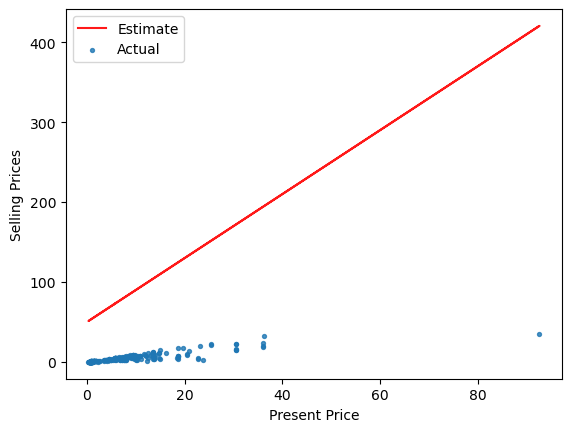

In [65]:
plt.plot(present_prices, estimated_selling_prices, 'r', alpha=0.9)
target = data.Selling_Price
plt.scatter(present_prices, target, s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Prices')
plt.legend(['Estimate', 'Actual'])

Comme nous pouvons le constater, il s’agit d’un modèle bien meilleur que les pondérations et les biais devinés au hasard que nous avions initialement utilisés. Ainsi, pour toute autre nouvelle donnée d'entrée invisible que nous pourrions saisir comme prix actuel, en suivant ce modèle, nous obtiendrons une approximation de son prix de vente.

## Linear Regression using Multiple Features

In [66]:
# Create inputs and targets
inputs = data[['Present_Price', 'Year','Kms_Driven']]
targets = data.Selling_Price

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 3.859516665759299


## Caractéristiques catégorielles

Dans notre ensemble de données, nous avons également des fonctionnalités catégorielles telles que Fuel_Type, Seller_Type, Transmission.

Il est d'abord important d'observer comment chaque valeur dans une catégorie spécifique affecte le prix de vente.

Le premier graphique montre le prix de vente moyen des voitures en fonction de leur type de carburant.

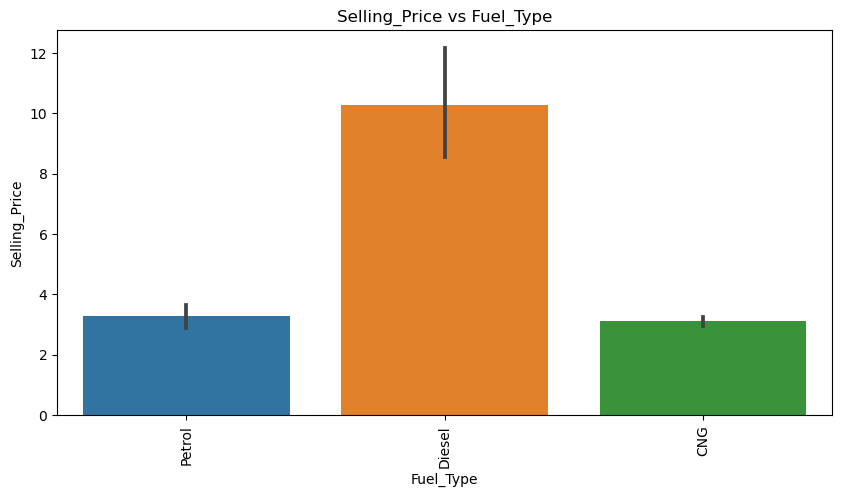

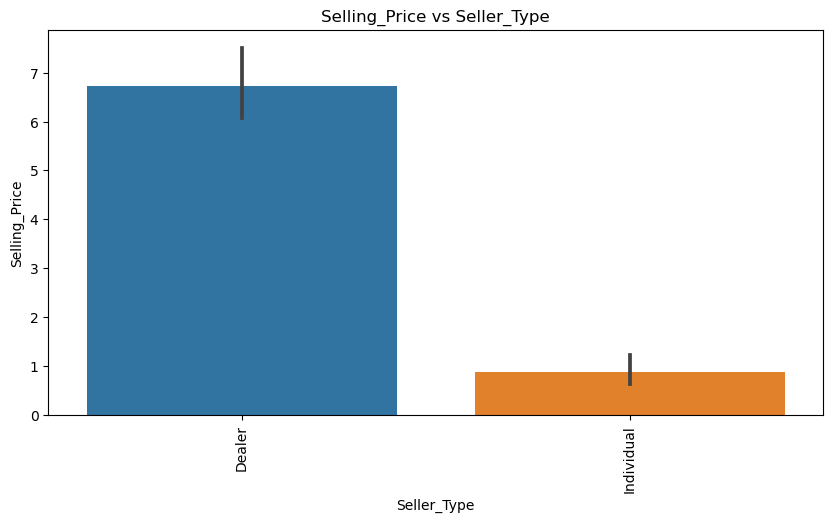

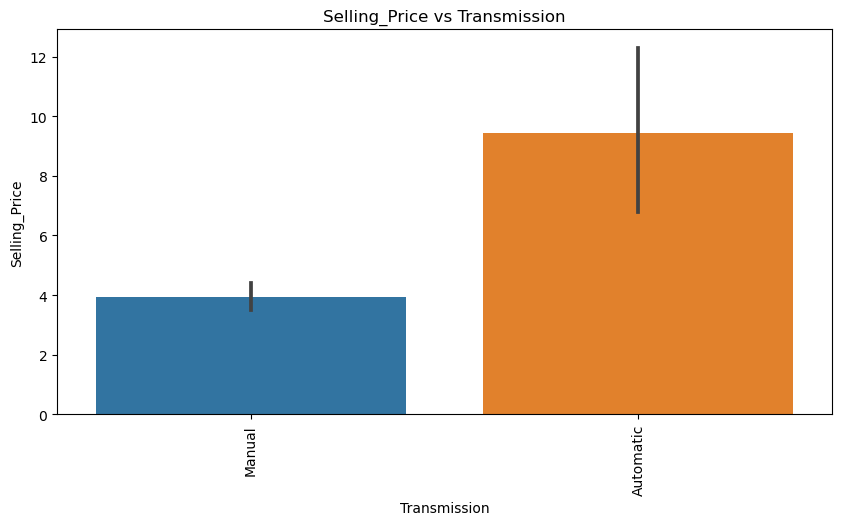

In [67]:
# List of categorical columns
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))  
    sns.barplot(data=data, x=column, y='Selling_Price')
    plt.xticks(rotation=90) 
    plt.title(f'Selling_Price vs {column}')
    plt.show()

Observations:

* Les voitures alimentées au diesel semblent être plus chères.
* Les voitures à transmission automatique sont plus chères.
* Les voitures vendues par des particuliers sont moins chères.

## One-Hot Encdoing - Converting Categorical Data

Avant de pouvoir appliquer des algorithmes d'apprentissage automatique à des variables catégorielles, nous devons les transformer sous forme numérique. Ce processus est connu sous le nom d’encodage.

In [68]:
data = pd.get_dummies(data, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first=True)

In [69]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


In [70]:
X = data.drop(['Car_Name','Selling_Price'], axis=1)
y = data['Selling_Price']

In [71]:
X

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0,1
297,2015,5.90,60000,0,0,1,0,1
298,2009,11.00,87934,0,0,1,0,1
299,2017,12.50,9000,0,1,0,0,1


## Training, Validation and Test Sets

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Mise à l'échelle des fonctionnalités

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Entraîner le modèle

MAE:  1.2401911938820391
MSE:  3.4868775495557154
MSE on training data:  2.8763210780593242
R2 score:  0.8504134196323443


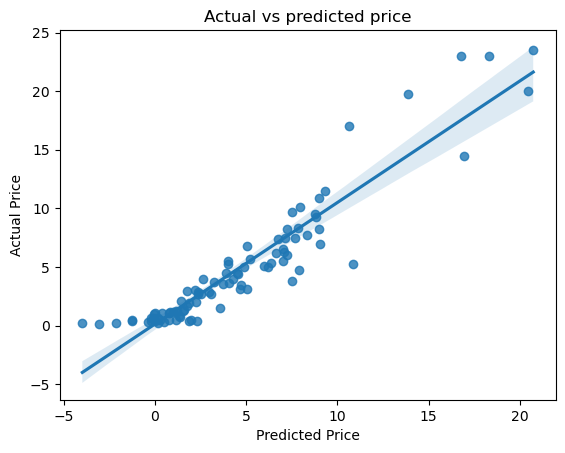

In [74]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

pred_train = model.predict(X_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("MSE on training data: ", (metrics.mean_squared_error(pred_train, y_train)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()